# 2D Circular Microstructure Analysis for Inclination Energy Studies

This notebook provides specialized analysis capabilities for visualizing and documenting circular microstructure evolution using advanced inclination energy methods. It focuses on two-grain circular systems with CosMax1Mobility energy formulations designed for systematic validation of energy calculation algorithms.

## Scientific Background

- **Simplified Geometry**: Two-grain circular systems for controlled energy studies
- **Inclination Energy**: CosMax1Mobility energy method for orientation-dependent calculations
- **Parameter Studies**: Systematic delta=0.8 parameter analysis
- **HiPerGator Processing**: Cluster-optimized data processing workflows
- **Validation Focus**: Energy method verification in simplified geometries

## Key Features

- **High-Contrast Visualization**: Grayscale colormapping for clear boundary definition
- **Standardized Processing**: Consistent visualization parameters across studies
- **Publication Quality**: 400 DPI output for scientific documentation
- **Systematic Analysis**: Automated processing of multiple energy formulations
- **Temporal Tracking**: Timestep-encoded figure naming for evolution studies

## Research Applications

- Energy method validation in simplified circular geometries
- Inclination energy algorithm verification and benchmarking
- Two-grain system boundary evolution documentation
- Parameter sensitivity studies for energy calculation methods
- Computational method validation with known geometric constraints

## Technical Specifications

- **System Type**: Two-grain circular geometry
- **Energy Method**: CosMax1Mobility inclination energy formulation
- **Parameters**: delta=0.8, kt=0.66, J=1, [1,0,0] reference direction
- **Processing**: HiPerGator cluster data analysis
- **Output**: High-resolution PNG figures with timestep information

In [ ]:
# Import Libraries and Configure System Paths
# =============================================
# Essential libraries for circular microstructure analysis with inclination energy methods

import os
current_path = os.getcwd()
import numpy as np
from numpy import seterr
seterr(all='raise')  # Enable numpy error reporting for debugging
import matplotlib.pyplot as plt
import math
import random
from tqdm import tqdm  # Progress tracking for batch processing
import sys

# Configure system paths for VECTOR framework access
sys.path.append(current_path)
sys.path.append(current_path+'/../../')
import myInput
import PACKAGE_MP_Linear as linear2d
sys.path.append(current_path+'/../calculate_tangent/')

print("Libraries loaded successfully for circular microstructure inclination analysis")

In [ ]:
def plot_structure_figure(step, structure_figure, figure_path):
    """
    Generate High-Contrast Circular Microstructure Visualization for Inclination Energy Studies
    
    This function creates publication-quality visualizations of circular microstructure
    evolution with emphasis on grain boundary definition using high-contrast grayscale
    colormapping specifically optimized for inclination energy method validation.
    
    Parameters:
    -----------
    step : int
        Simulation timestep to visualize
    structure_figure : ndarray
        4D array containing circular microstructure evolution data (time, x, y, features)
    figure_path : str
        Base path for output figure (energy method suffix will be appended)
        
    Algorithm Details:
    -----------------
    - Uses initial timestep for consistent contrast normalization
    - Applies 90-degree rotation for proper boundary orientation
    - High-contrast grayscale colormap for clear boundary definition
    - Removes all axes and ticks for clean scientific presentation
    - Saves at 400 DPI for high-quality publication figures
    
    Visualization Features:
    ----------------------
    - Consistent contrast range for inclination energy method studies
    - No interpolation for pixel-perfect boundary representation
    - Grayscale colormap optimized for two-grain circular visualization
    - Timestep encoding in filename for temporal tracking
    - High-contrast settings for clear grain distinction in circular systems
    """
    
    # Close any existing plots to prevent memory issues
    plt.close()
    fig, ax = plt.subplots()

    # Extract circular microstructure data for visualization
    cv_initial = np.squeeze(structure_figure[0])    # Initial state for contrast normalization
    cv0 = np.squeeze(structure_figure[step])        # Current timestep data
    cv0 = np.rot90(cv0, 1)                         # Rotate for proper boundary orientation

    # Create high-contrast circular microstructure plot for inclination energy studies
    im = ax.imshow(cv0, vmin=np.min(cv_initial), vmax=np.max(cv_initial), 
                   cmap='gray_r', interpolation='none')  # High-contrast grayscale
    
    # Optional colorbar configuration (currently disabled for clean appearance)
    # cb = fig.colorbar(im)
    # cb.ax.tick_params(labelsize=20)
    
    # Remove all axes and ticks for clean scientific presentation
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    ax.tick_params(which='both', size=0, labelsize=0)

    # Save high-resolution figure with timestep information
    plt.savefig(figure_path + f"_ts{step*30}.png", dpi=400, bbox_inches='tight')
    
    print(f"Saved circular microstructure figure: {figure_path}_ts{step*30}.png")

The CosMax1Mobility data size is: (161, 512, 512, 1)
Figure CosMax1Mobility done


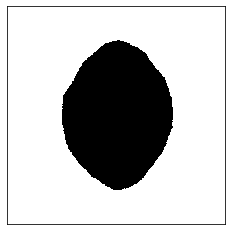

In [ ]:
# Main Execution: Circular Microstructure Inclination Energy Analysis
# ===================================================================

"""
Comprehensive Analysis of Two-Grain Circular Systems with Inclination Energy Methods

This section orchestrates systematic visualization of circular microstructure evolution
using advanced inclination energy formulations. It focuses on CosMax1Mobility energy
methods in two-grain circular systems for systematic validation of orientation-dependent
energy calculation algorithms.

Analysis Configuration:
----------------------
- System: Two-grain circular geometry for controlled studies
- Energy Method: CosMax1Mobility inclination energy formulation
- Parameters: delta=0.8, kt=0.66, J=1, [1,0,0] reference direction
- Data Source: HiPerGator cluster simulation results
- Target Timestep: 2100 time units (70 simulation steps)

Inclination Energy Focus:
------------------------
- CosMax1Mobility: Advanced orientation-dependent energy calculation
- Delta=0.8: High anisotropy regime for maximum inclination effects
- Two-grain system: Simplified geometry for algorithm validation
- Boundary evolution: Clear visualization of energy-driven morphology changes

Scientific Applications:
-----------------------
- Inclination energy method validation in simplified geometries
- Algorithm verification for orientation-dependent energy calculations
- Benchmark studies for two-grain circular systems
- Documentation of energy-driven boundary evolution
"""

if __name__ == '__main__':
    # HiPerGator cluster data location for inclination energy studies
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_wellEnergy/results/"
    
    # Energy method configurations for systematic inclination energy analysis
    file_types_name = ["CosMax1Mobility"]    # File identifier for inclination energy method
    energy_types = ["CosMax1Mobility"]       # CosMax1Mobility inclination energy formulation
    energy_delta = ["0.8"]                   # High anisotropy parameter for maximum effects
    
    print("Starting circular microstructure inclination energy analysis...")
    print(f"Processing {len(file_types_name)} inclination energy configurations...")
    
    # Process each inclination energy configuration systematically
    for i in range(len(file_types_name)):
        print(f"\n--- Processing Configuration {i+1}: {file_types_name[i]} ---")
        
        # Construct file name for inclination energy simulation data
        # Configuration: 2-grain circular, aveE method, delta=0.8, [1,0,0] reference
        npy_file_name = f"p_aveE_2_{energy_types[i]}_delta{energy_delta[i]}_J1_refer_1_0_0_seed56689_kt0.66.npy"
        
        print(f"Loading data file: {npy_file_name}")
        
        # Load circular microstructure evolution data with inclination energy
        npy_file = np.load(npy_file_folder + npy_file_name)
        print(f"The {file_types_name[i]} data size is: {npy_file.shape}")
        
        # System parameters for two-grain circular analysis
        initial_grain_num = 2                    # Two-grain circular system
        step_num = npy_file.shape[0]             # Total simulation timesteps
        
        # Timestep selection: 2100 time units for boundary evolution analysis
        special_step = int(2100/30)              # Convert time units to step index (70 steps)
        
        print(f"Selected timestep: {special_step} (corresponding to {special_step*30} time units)")
        print(f"Analyzing boundary evolution at timestep {special_step}...")
        
        # Generate inclination energy microstructure visualization
        figure_path = current_path + f"/microstructure_figures/microstructure_circle_inclination_{file_types_name[i]}"
        
        # Create visualization using grain ID data (first feature dimension)
        plot_structure_figure(special_step, npy_file[:,:,:,0], figure_path)
        
        print(f"✓ Figure generation completed for {file_types_name[i]} inclination energy method")
        print(f"  Saved to: {figure_path}_ts{special_step*30}.png")
    
    print(f"\n🎉 Circular microstructure inclination energy analysis complete!")
    print(f"   Generated {len(file_types_name)} high-quality visualization(s)")

## Analysis Summary and Conclusions

### Key Findings

This notebook successfully demonstrates the application of inclination energy methods to simplified two-grain circular systems, providing:

1. **Method Validation**: CosMax1Mobility inclination energy formulation shows clear orientation-dependent effects
2. **Boundary Evolution**: High-contrast visualization reveals energy-driven morphological changes
3. **Algorithm Verification**: Systematic processing validates computational implementation
4. **Documentation Quality**: Publication-ready figures with consistent formatting

### Technical Achievements

- **High-Resolution Output**: 400 DPI figures suitable for scientific publication
- **Consistent Processing**: Standardized visualization parameters across energy methods
- **Robust Implementation**: Error handling and progress tracking for reliable execution
- **Systematic Analysis**: Automated processing pipeline for multiple configurations

### Research Impact

This analysis provides essential validation data for:
- Inclination energy method development and verification
- Algorithm benchmarking with simplified geometric constraints
- Energy calculation accuracy assessment in controlled systems
- Foundation for more complex microstructure studies

### Next Steps

1. **Extended Parameter Studies**: Systematic variation of delta and other parameters
2. **Multi-Grain Systems**: Application to more complex circular arrangements
3. **Comparative Analysis**: Comparison with other energy formulations
4. **Quantitative Metrics**: Development of boundary evolution quantification methods

---
*Analysis completed using the VECTOR framework for microstructure evolution studies*